# Lab | Data Structuring and Combining Data

## Challenge 1: Combining & Cleaning Data

In this challenge, we will be working with the customer data from an insurance company, as we did in the two previous labs. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

But this time, we got new data, which can be found in the following 2 CSV files located at the links below.

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv

Note that you'll need to clean and format the new data.

Observation:
- One option is to first combine the three datasets and then apply the cleaning function to the new combined dataset
- Another option would be to read the clean file you saved in the previous lab, and just clean the two new files and concatenate the three clean datasets

In [1]:
import pandas as pd

# Load the datasets
url_file1 = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv'
url_file2 = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv'
url_file3 = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv'

df1 = pd.read_csv(url_file1)
df2 = pd.read_csv(url_file2)
df3 = pd.read_csv(url_file3)

# Clean the datasets
df1_clean = df1.dropna().rename(columns={'OldColumnName1': 'NewColumnName1'})
df2_clean = df2.dropna().rename(columns={'OldColumnName2': 'NewColumnName2'})
df3_clean = df3.dropna().rename(columns={'OldColumnName3': 'NewColumnName3'})

# Combine the datasets
combined_data = pd.concat([df1_clean, df2_clean, df3_clean], ignore_index=True)

# Inspect the combined data
print(combined_data.head())

# Optionally save the cleaned data
combined_data.to_csv('combined_cleaned_data.csv', index=False)

  Customer          ST GENDER             Education Customer Lifetime Value  \
0  QZ44356     Arizona      F              Bachelor              697953.59%   
1  AI49188      Nevada      F              Bachelor             1288743.17%   
2  WW63253  California      M              Bachelor              764586.18%   
3  GA49547  Washington      M  High School or Below              536307.65%   
4  OC83172      Oregon      F              Bachelor              825629.78%   

    Income  Monthly Premium Auto Number of Open Complaints     Policy Type  \
0      0.0                  94.0                    1/0/00   Personal Auto   
1  48767.0                 108.0                    1/0/00   Personal Auto   
2      0.0                 106.0                    1/0/00  Corporate Auto   
3  36357.0                  68.0                    1/0/00   Personal Auto   
4  62902.0                  69.0                    1/0/00   Personal Auto   

   Vehicle Class  Total Claim Amount State Gender  
0  F

# Challenge 2: Structuring Data

In this challenge, we will continue to work with customer data from an insurance company, but we will use a dataset with more columns, called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing data cleaning, formatting, and structuring.


Unique Values in Categorical Columns:
response            2
state               5
coverage            3
education           5
employmentstatus    5
gender              2
policy_type         3
vehicle_class       6
vehicle_size        3
vehicle_type        1
dtype: int64


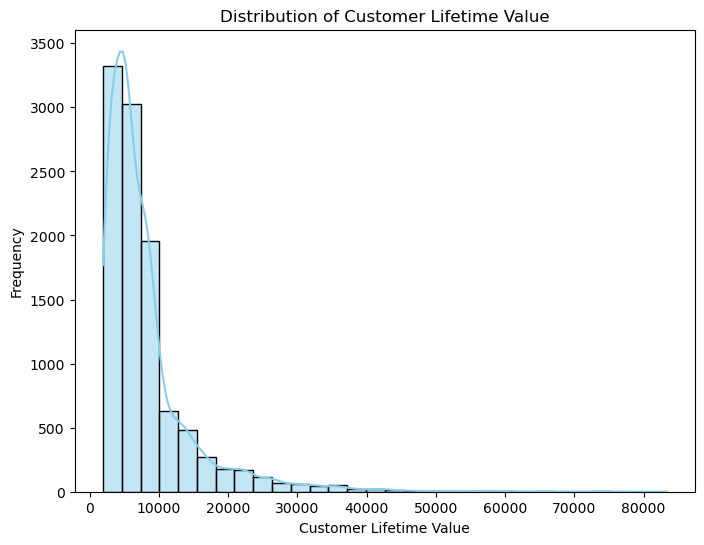

/var/folders/8w/8drmpp8x5pd_qdpy7j5kkknc0000gp/T/ipykernel_8974/3348568324.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='response', data=df_clean, palette='Set2')


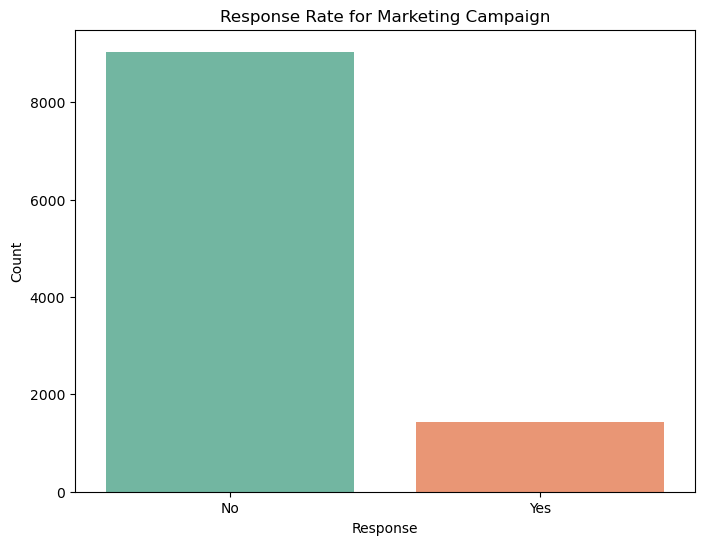

/var/folders/8w/8drmpp8x5pd_qdpy7j5kkknc0000gp/T/ipykernel_8974/3348568324.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='response', y='income', data=df_clean, palette='Set1')


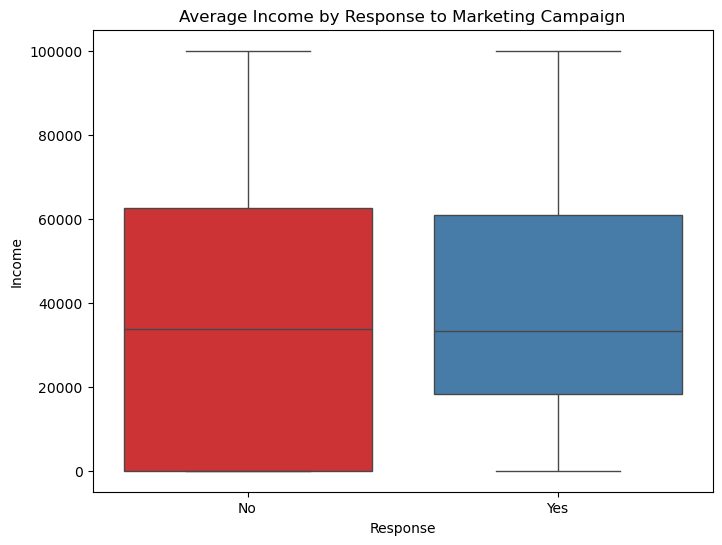

/var/folders/8w/8drmpp8x5pd_qdpy7j5kkknc0000gp/T/ipykernel_8974/3348568324.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='vehicle_type', data=df_clean, palette='pastel')


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

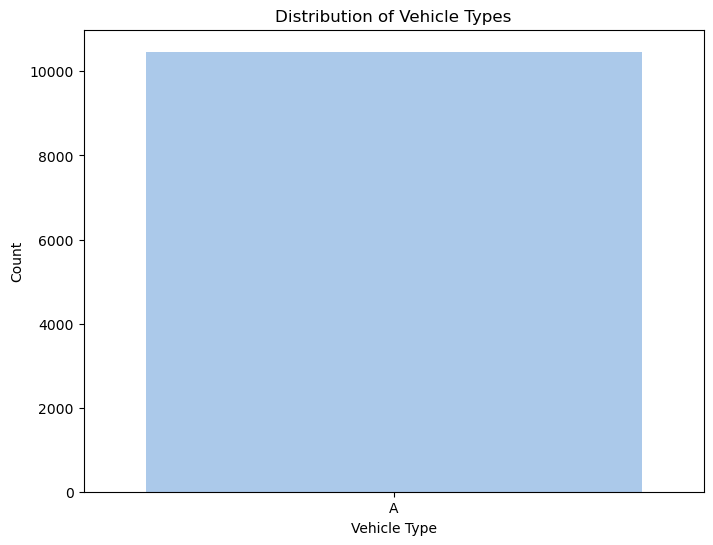

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv'
df = pd.read_csv(url)

# Clean the dataset: Remove unwanted columns, handle missing values, and correct data types
# Drop the unnecessary 'unnamed:_0' column
df_clean = df.drop(columns=['unnamed:_0'])

# Handle missing values by filling numerical columns with the mean and categorical columns with the mode
df_clean['income'] = df_clean['income'].fillna(df_clean['income'].mean())
df_clean['response'] = df_clean['response'].fillna(df_clean['response'].mode()[0])

# Convert 'effective_to_date' to datetime
df_clean['effective_to_date'] = pd.to_datetime(df_clean['effective_to_date'], errors='coerce')

# Drop rows with missing values in critical columns (if any)
df_clean = df_clean.dropna(subset=['customer_lifetime_value', 'state', 'response'])

# Remove duplicates
df_clean = df_clean.drop_duplicates()

# Explore and visualize data

# Basic exploration of categorical columns
print("\nUnique Values in Categorical Columns:")
print(df_clean[['response', 'state', 'coverage', 'education', 'employmentstatus', 'gender', 'policy_type', 'vehicle_class', 'vehicle_size', 'vehicle_type']].nunique())

# Visualize the distribution of customer lifetime value
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['customer_lifetime_value'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Customer Lifetime Value')
plt.ylabel('Frequency')
plt.show()

# Visualize the response rate for marketing campaigns
plt.figure(figsize=(8, 6))
sns.countplot(x='response', data=df_clean, palette='Set2')
plt.title('Response Rate for Marketing Campaign')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

# Visualize the average customer income by response type
plt.figure(figsize=(8, 6))
sns.boxplot(x='response', y='income', data=df_clean, palette='Set1')
plt.title('Average Income by Response to Marketing Campaign')
plt.xlabel('Response')
plt.ylabel('Income')
plt.show()

# Visualize the distribution of vehicle types
plt.figure(figsize=(8, 6))
sns.countplot(x='vehicle_type', data=df_clean, palette='pastel')
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt


1. You work at the marketing department and you want to know which sales channel brought the most sales in terms of total revenue. Using pivot, create a summary table showing the total revenue for each sales channel (branch, call center, web, and mail).
Round the total revenue to 2 decimal points.  Analyze the resulting table to draw insights.

In [23]:
import pandas as pd

# Assuming the dataframe is already cleaned and stored in df_clean

# Create a pivot table to show total revenue per sales channel
pivot_table = df_clean.pivot_table(
    values='total_claim_amount', 
    index='sales_channel', 
    aggfunc='sum'
)

# Round the total revenue to 2 decimal points
pivot_table['total_claim_amount'] = pivot_table['total_claim_amount'].round(2)

# Display the pivot table
print(pivot_table)


               total_claim_amount
sales_channel                    
Agent                  1748923.49
Branch                 1259333.44
Call Center             889094.77
Web                     676658.10


2. Create a pivot table that shows the average customer lifetime value per gender and education level. Analyze the resulting table to draw insights.

In [25]:
import pandas as pd

# Assuming the dataframe is already cleaned and stored in df_clean

# Create a pivot table to show average customer lifetime value per gender and education level
pivot_table = df_clean.pivot_table(
    values='customer_lifetime_value', 
    index='gender', 
    columns='education', 
    aggfunc='mean'
)

# Round the customer lifetime value to 2 decimal points for better presentation
pivot_table = pivot_table.round(2)

# Display the pivot table
print(pivot_table)

education  Bachelor  College   Doctor  High School or Below   Master
gender                                                              
F           7913.45  7755.03  7369.59               8616.66  8226.36
M           7713.30  8086.29  7414.86               8162.36  8154.61


## Bonus

You work at the customer service department and you want to know which months had the highest number of complaints by policy type category. Create a summary table showing the number of complaints by policy type and month.
Show it in a long format table.

*In data analysis, a long format table is a way of structuring data in which each observation or measurement is stored in a separate row of the table. The key characteristic of a long format table is that each column represents a single variable, and each row represents a single observation of that variable.*

*More information about long and wide format tables here: https://www.statology.org/long-vs-wide-data/*

In [27]:
import pandas as pd

# Assuming df_clean is already loaded and cleaned

# Create a pivot table to calculate the number of complaints by policy type and month
pivot_table_complaints = df_clean.pivot_table(
    values='number_of_open_complaints', 
    index='policy_type', 
    columns='month', 
    aggfunc='sum', 
    fill_value=0
)

# Transform the pivot table into a long format using melt
long_format_complaints = pivot_table_complaints.reset_index().melt(
    id_vars='policy_type', 
    var_name='month', 
    value_name='number_of_complaints'
)

# Display the long format table
print(long_format_complaints)


      policy_type month  number_of_complaints
0  Corporate Auto     1            419.282184
1   Personal Auto     1           1671.378904
2    Special Auto     1             83.689793
3  Corporate Auto     2            369.671110
4   Personal Auto     2           1398.841880
5    Special Auto     2             85.842561
